In [1]:
#SML-------------------------------------------Linear Regression-----------------------------------------------

In [4]:
from sklearn import datasets

In [5]:
dir(datasets)  #all the datasets inbuilds with sklearn

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'kddcup99',
 'lfw',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_lfw_pairs',
 'load_lfw_people',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hast

In [6]:
'''data-independent vars,
   Target-dependent var,  
   feature-column heading'''

In [7]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.datasets import load_boston

In [11]:
import matplotlib.pyplot as plt

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn import metrics

In [14]:
boston=load_boston()  # take a look on this : http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [15]:
print("Shape of independent vars in datasets is", boston.data.shape)

Shape of independent vars in datasets is (506, 13)


In [16]:
print("column names are: ", boston.feature_names)

column names are ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [17]:
print("maximum price of the house is :", np.max(boston.target))

maximum price of the house is : 50.0


In [19]:
print("min price of the house is :", np.min(boston.target))

min price of the house is : 5.0


In [20]:
print("mean price of the house is :", np.mean(boston.target))

mean price of the house is : 22.5328063241


In [21]:
#creating a dataframe

In [22]:
bos=pd.DataFrame(boston.data)

In [23]:
bos.columns = boston.feature_names

In [24]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
bos['price']=boston.target

In [26]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
x=bos.drop('price', axis=1)  #axis=1 means col wise....heare we are assigning independent var to x

In [29]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
model=LinearRegression()

In [31]:
model.fit(x, bos.price)  #

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print("intercept is ", model.intercept_)

intercept is  36.4911032804


In [34]:
print("no of slops are ", len(model.coef_))

no of slops are  13


In [35]:
print("slops are ", model.coef_)

slops are  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]


In [37]:
plt.scatter(bos.RM, bos.price)

In [38]:
plt.xlabel("No of rooms per dwelling ")

In [39]:
plt.ylabel("Pricer of the house ")

In [40]:
plt.title("Relation b/w No of rooms per dwelling and prices of house")

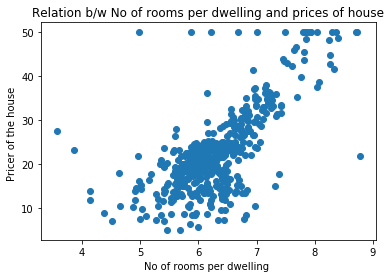

In [41]:
plt.show()

In [42]:
#now we are going to see mse of model

In [43]:
x_train,x_test,y_train,y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=3)  #random_state means seeding, its a random pickup of 3 rows in an interval

In [44]:
print("x_train shape is ", x_train.shape)

x_train shape is  (151, 13)


In [45]:
print("y_train shape is ", y_train.shape)

y_train shape is  (151,)


In [46]:
print("x_test shape is ", x_test.shape)

x_test shape is  (355, 13)


In [47]:
print("y_test shape is ", y_test.shape)

y_test shape is  (355,)


In [48]:
model = LinearRegression()

In [50]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
pv = model.predict(x_test)

In [ ]:
#two ways to find MSE

In [52]:
print("MSE of model is ", metrics.mean_squared_error(pv, y_test))

MSE of model is  23.6022725513


In [53]:
print("MSE of model is ", np.mean((pv - y_test)**2))

MSE of model is  23.6022725513


In [54]:
'''MT cars dataset : https://github.com/sap0408/mtcars

    dependent var(Target)= mpg (milage per gallan)
    independent var(data) = cyl, drat, hp, disp(displacement)
    
    try at home'''

'MT cars dataset : https://github.com/sap0408/mtcars\n\n    dependent var(Target)= mpg (milage per gallan)\n    independent var(data) = cyl, drat, hp, disp(displacement)\n    \n    try at home'

In [58]:
#'''Logistic Regression'''--------------------------------------------------------------------